**LINEAR REGRESSION WITH PYTORCH**

1. Import necessary library

In [53]:
import torch
from torch import nn
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

torch.__version__

'2.0.0+cu118'

2. Creating data

In [54]:
weight = 0.9
bias = 0.2

x = torch.linspace(0,100,200).unsqueeze(dim=1)
y = weight * x + bias
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)
print(f"Size# x_train : {x_train.shape}, x_test : {x_test.shape}")

Size# x_train : torch.Size([150, 1]), x_test : torch.Size([50, 1])


3. Visualize data

In [55]:
def visualizeData(x_train,y_train,x_test,y_test,y_pred=None):
    plt.figure(figsize=(8,8))
    plt.title("Visualize Data")
    plt.scatter(x_train,y_train,c="r",s=10,label="training data")
    plt.scatter(x_test,y_test,c="b",s=10,label="testing data")
    if y_pred is not None:
       plt.scatter(x_test,y_pred,c="g",s=10,label="predict") 
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

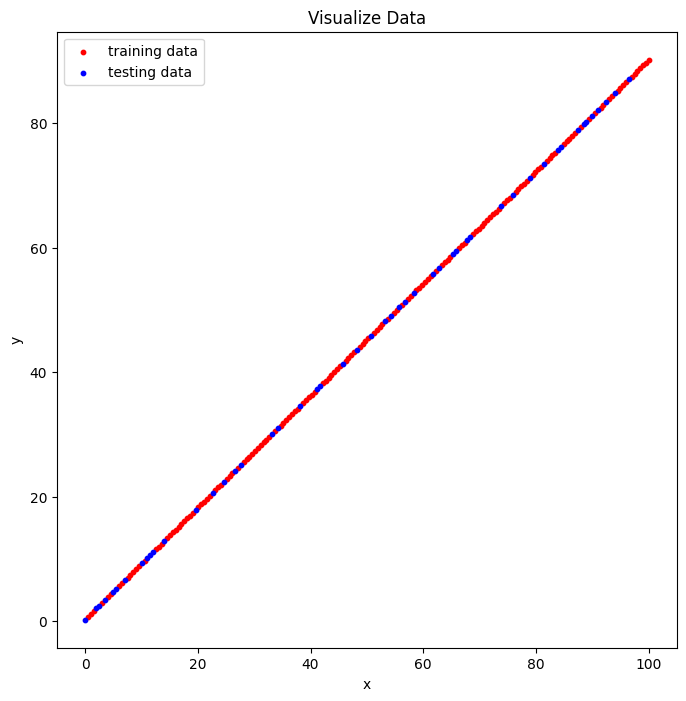

In [56]:
visualizeData(x_train,y_train,x_test,y_test)

4. Build Model

In [57]:
class LinearRegressionClass1(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

  def forward(self,x : torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias
    
class LinearRegressionClass(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_regress = nn.Linear(in_features=1,out_features=1)

    def forward(self , x : torch.Tensor)->torch.Tensor:
        return self.linear_regress(x)

5. Evaluating model not learning and visualize

OrderedDict([('linear_regress.weight', tensor([[-0.8933]])), ('linear_regress.bias', tensor([0.4224]))])


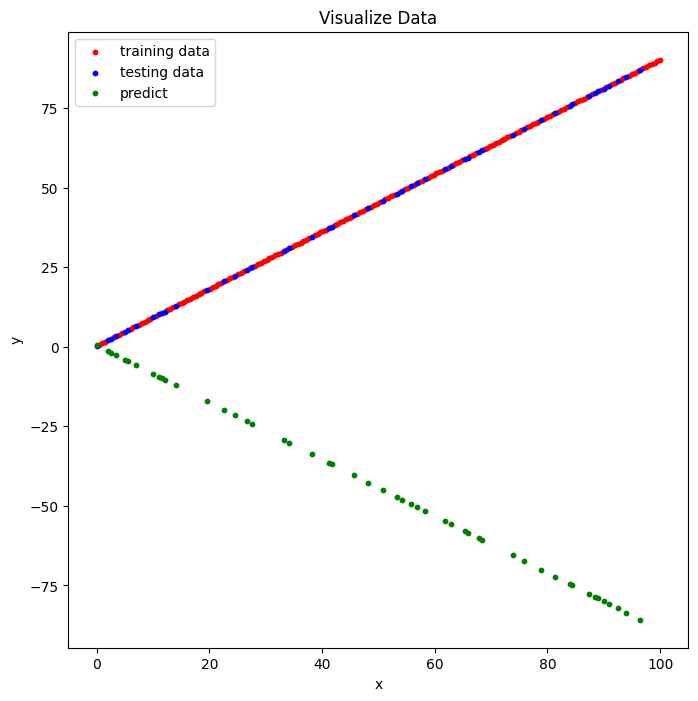

In [58]:
#torch.manual_seed(0)
model = LinearRegressionClass()
print(model.state_dict())
with torch.inference_mode(): 
    y_pred = model(x_test)
visualizeData(x_train,y_train,x_test,y_test,y_pred)

6. Loss func and Optimizer func

In [59]:
loss_func = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

7. Training model

In [60]:
EPOCHS = 1000
epoch_list = []
loss_train_list = []
loss_test_list = []

for epoch in range(EPOCHS):
    # Training process
    model.train()

    y_pred_train = model(x_train)
    loss_train = loss_func(y_train,y_pred_train)

    optimizer.zero_grad()

    loss_train.backward()
    optimizer.step()

    # Evaluating process
    model.eval()
    with torch.inference_mode():
        y_pred_test = model(x_test)
        loss_test = loss_func(y_test,y_pred_test)

        # Save result each 10 epoch
        if epoch % 20 == 0:
            epoch_list.append(epoch)
            loss_train_list.append(loss_train.detach().numpy())
            loss_test_list.append(loss_test.detach().numpy())
            print(f"Epoch {epoch}# MAE Train Lose : {loss_train}, MAE Test Lose : {loss_test}")

Epoch 0# MAE Train Lose : 90.44832611083984, MAE Test Lose : 83.99989318847656
Epoch 20# MAE Train Lose : 39.30314254760742, MAE Test Lose : 35.118404388427734
Epoch 40# MAE Train Lose : 1.4540642499923706, MAE Test Lose : 1.0873055458068848
Epoch 60# MAE Train Lose : 1.1345735788345337, MAE Test Lose : 1.3858758211135864
Epoch 80# MAE Train Lose : 0.940394401550293, MAE Test Lose : 1.567533016204834
Epoch 100# MAE Train Lose : 0.7740686535835266, MAE Test Lose : 1.7238669395446777
Epoch 120# MAE Train Lose : 0.6505545377731323, MAE Test Lose : 1.8399379253387451
Epoch 140# MAE Train Lose : 0.5515112280845642, MAE Test Lose : 1.9329957962036133
Epoch 160# MAE Train Lose : 0.4524680972099304, MAE Test Lose : 2.02632474899292
Epoch 180# MAE Train Lose : 0.35342535376548767, MAE Test Lose : 2.1198441982269287
Epoch 200# MAE Train Lose : 0.2543824315071106, MAE Test Lose : 2.2135448455810547
Epoch 220# MAE Train Lose : 0.15534034371376038, MAE Test Lose : 2.307485580444336
Epoch 240# MAE T

8. Evaluating model 

OrderedDict([('linear_regress.weight', tensor([[0.8989]])), ('linear_regress.bias', tensor([0.4200]))])


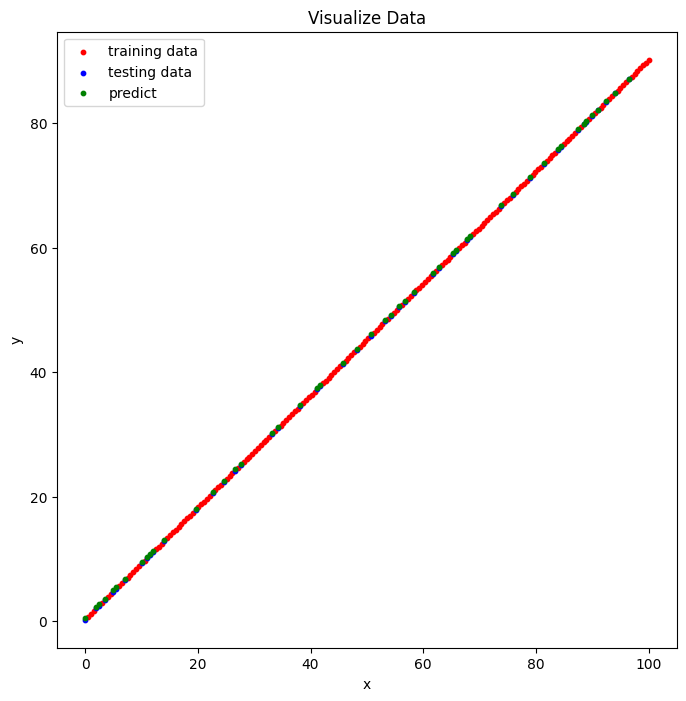

In [61]:
print(model.state_dict())
with torch.inference_mode(): 
    y_pred = model(x_test)
visualizeData(x_train,y_train,x_test,y_test,y_pred)

9. Visualize loss

In [62]:
def visualizeLoss(epoch,loss_train,loss_test):
    plt.figure(figsize=(8,8))
    plt.title("Visualize Loss")
    plt.plot(epoch,loss_train,c="r",label="training loss")
    plt.plot(epoch,loss_test,c="b",label="testing loss")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()
    plt.show()

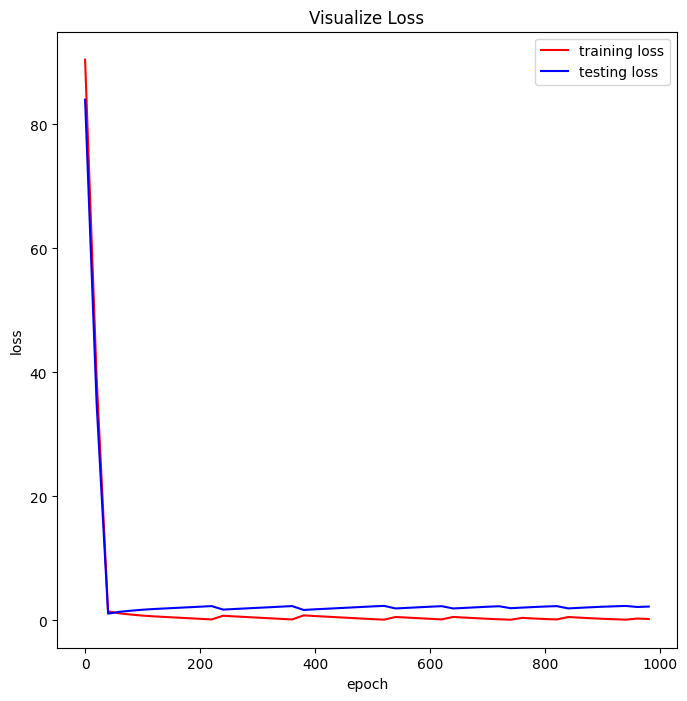

In [63]:
visualizeLoss(epoch_list,loss_train_list,loss_test_list)

10. Save model

In [64]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME = "linear_regression_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),f=MODEL_SAVE_PATH)

Saving model to models/linear_regression_model.pth
